In [ ]:
"""
(1) 輸入4個引數：雙尾檢定(例如雙尾="T"，左尾="L"，右尾="R")、alpha(例如0.05)、自由度(例如36.5)及t統計量(例如0.5664)
(2) 產生t分配圖，圖表必須清楚標示出拒絕域(深色)、臨界值，及t統計量的位置。
"""

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def t_test(hypothesis, alpha, df, t_stat):
    # 計算臨界值
    if hypothesis == "T":
        crit_val = stats.t.ppf(1 - alpha/2, df)
        left_crit_val = -crit_val
        right_crit_val = crit_val
    elif hypothesis == "L":
        crit_val = stats.t.ppf(alpha, df)
        left_crit_val = -np.inf
        right_crit_val = crit_val
    elif hypothesis == "R":
        crit_val = stats.t.ppf(1 - alpha, df)
        left_crit_val = crit_val
        right_crit_val = np.inf

    # 繪製t分配圖
    x = np.linspace(-5, 5, 1000)
    y = stats.t.pdf(x, df)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, 'k', linewidth=2)
    ax.axvline(left_crit_val, color='red', linestyle='--', linewidth=2)
    ax.axvline(right_crit_val, color='red', linestyle='--', linewidth=2)
    ax.axvline(t_stat, color='green', linewidth=2)
    
    # 自搞拒絕域(深色)及臨界值、統計量數值顯示
    if hypothesis == "T":
        ax.fill_between(x, 0, y, where=(x<=left_crit_val) | (x>=right_crit_val), color='gray', alpha=0.5)
        ax.text(left_crit_val, 0.43, f'critical value={-crit_val:.3f}', ha='center')
        ax.text(right_crit_val, 0.43, f'critical value={crit_val:.3f}', ha='center')
        ax.text(t_stat, 0.2, f't_stat={t_stat:.4f}', ha='center', color='green')
    elif hypothesis == "L":
        ax.fill_between(x, 0, y, where=(x<=right_crit_val), color='gray', alpha=0.5)
        ax.text(right_crit_val, 0.43, f'critical value={crit_val:.3f}', ha='center')
        ax.text(t_stat, 0.35, f't_stat={t_stat:.4f}', ha='center', color='green')
    elif hypothesis == "R":
        ax.fill_between(x, 0, y, where=(x>=left_crit_val), color='gray', alpha=0.5)
        ax.text(left_crit_val, 0.43, f'critical value={-crit_val:.3f}', ha='center')
        ax.text(t_stat, 0.35, f't_stat={t_stat:.4f}', ha='center', color='green')
        
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 0.45)
    ax.set_xlabel('t')
    ax.set_ylabel('Density')
    ax.set_title('t Distribution')
    plt.show()

    # 檢定結果
    if hypothesis == "T":
        if t_stat < left_crit_val or t_stat > right_crit_val:
            print("Reject Ho.")
        else:
            print("Fail to reject Ho.")
    elif hypothesis == "L":
        if t_stat < right_crit_val:
            print("Reject Ho.")
        else:
            print("Fail to reject Ho.")
    elif hypothesis == "R":
        if t_stat > left_crit_val:
            print("Reject Ho.")
        else:
            print("Fail to reject Ho.")


In [ ]:
t_test(hypothesis="T", alpha=0.05, df=36.5, t_stat=0.5664)

In [ ]:
# 故意弄顯著的案例，把bias調整為0.1
xx= 0.1/0.0459
t_test(hypothesis="T", alpha=0.05, df=36.5, t_stat=xx)

In [ ]:
# 設定引數值，bias 獨立樣本法案例
t_test(hypothesis="T", alpha=0.05, df=14, t_stat=0.1224)

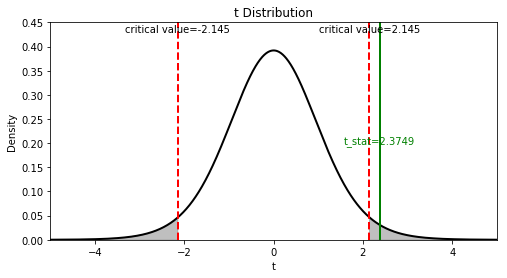

Reject Ho.


In [21]:
# 設定引數值，bias 獨立樣本法案例
# 故意弄顯著的案例，把bias調整為0.13
xx= 0.13/0.05474
t_test(hypothesis="T", alpha=0.05, df=14, t_stat=xx)